Загрузили корпус текстов

In [4]:
!wget https://raw.githubusercontent.com/karpathy/char-rnn/master/data/tinyshakespeare/input.txt

--2024-01-28 16:14:03--  https://raw.githubusercontent.com/karpathy/char-rnn/master/data/tinyshakespeare/input.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1115394 (1.1M) [text/plain]
Saving to: ‘input.txt.1’

input.txt.1         100%[===================>]   1.06M  --.-KB/s    in 0.06s   

2024-01-28 16:14:03 (16.6 MB/s) - ‘input.txt.1’ saved [1115394/1115394]



Открыли файл

In [3]:
file_path = 'input.txt'
with open(file_path, 'r') as file:
  text_content = file.read()

Провели предобработку

In [5]:
import re
def clean_text(text):
   text = text.lower()
   text = re.sub(r'[^a-z\s]', '', text)
   text = re.sub(r'\s+', ' ', text).strip()
   return text
cleaned_text = clean_text(text_content)

'first citizen before we proceed any further hear me speak all speak speak first citizen you are all '

Токенизация и удаление стоп-слов

In [12]:
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
tokens = word_tokenize(cleaned_text)
stop_words = set(stopwords.words('english'))
filtered_tokens = [word for word in tokens if word.lower() not in stop_words]
print("Our text:", cleaned_text)
print("Tokens without stopwords:", filtered_tokens)

Our text: first citizen before we proceed any further hear me speak all speak speak first citizen you are all resolved rather to die than to famish all resolved resolved first citizen first you know caius marcius is chief enemy to the people all we knowt we knowt first citizen let us kill him and well have corn at our own price ist a verdict all no more talking ont let it be done away away second citizen one word good citizens first citizen we are accounted poor citizens the patricians good what authority surfeits on would relieve us if they would yield us but the superfluity while it were wholesome we might guess they relieved us humanely but they think we are too dear the leanness that afflicts us the object of our misery is as an inventory to particularise their abundance our sufferance is a gain to them let us revenge this with our pikes ere we become rakes for the gods know i speak this in hunger for bread not in thirst for revenge second citizen would you proceed especially again

Лемматизация

In [14]:
nltk.download('wordnet')
lemmatizer = WordNetLemmatizer()
lemmatized_text = [lemmatizer.lemmatize(word) for word in tokens]

print("Our text:", cleaned_text)
print("Lemmas:", lemmatized_text)

[nltk_data] Downloading package wordnet to /root/nltk_data...


Our text: first citizen before we proceed any further hear me speak all speak speak first citizen you are all resolved rather to die than to famish all resolved resolved first citizen first you know caius marcius is chief enemy to the people all we knowt we knowt first citizen let us kill him and well have corn at our own price ist a verdict all no more talking ont let it be done away away second citizen one word good citizens first citizen we are accounted poor citizens the patricians good what authority surfeits on would relieve us if they would yield us but the superfluity while it were wholesome we might guess they relieved us humanely but they think we are too dear the leanness that afflicts us the object of our misery is as an inventory to particularise their abundance our sufferance is a gain to them let us revenge this with our pikes ere we become rakes for the gods know i speak this in hunger for bread not in thirst for revenge second citizen would you proceed especially again

Обучение векторов

In [15]:
from gensim.models import Word2Vec
model = Word2Vec(sentences=[tokens], vector_size=100, window=5, min_count=1, workers=4)
model.wv['queen']

array([ 0.00626466, -0.00066751, -0.00421348, -0.00368945, -0.00598415,
        0.0008629 ,  0.00937141,  0.00094907, -0.00529773,  0.00218863,
       -0.00100993, -0.00890137, -0.00971697, -0.00798191, -0.00315136,
        0.00478508,  0.00275953,  0.00488755, -0.00266605, -0.00746503,
       -0.00012692,  0.00530129,  0.00811852,  0.00899913, -0.00415548,
        0.00897774,  0.00059863,  0.00122774,  0.00497583, -0.00709766,
       -0.00155245,  0.00559906,  0.00421756,  0.00032792,  0.00477401,
        0.00809798,  0.00680932,  0.0007767 ,  0.00944267, -0.00577521,
        0.00296882, -0.00764509,  0.00655831, -0.00952175, -0.00812216,
        0.00785281, -0.00854293,  0.00844177, -0.00306958, -0.00811547,
       -0.00250571,  0.00363615,  0.00946821, -0.0040969 ,  0.00310098,
        0.0074762 , -0.00102211,  0.00932317, -0.00530056, -0.00098855,
       -0.00478821, -0.00231824,  0.00236074,  0.00801239,  0.00749827,
       -0.00437944, -0.00136755,  0.00786058,  0.00913214,  0.00

In [17]:
model.wv.most_similar(["queen"])

[('duke', 0.3392879366874695),
 ('closeness', 0.3313758969306946),
 ('golden', 0.32997384667396545),
 ('cherishing', 0.3291633427143097),
 ('compounded', 0.3249761760234833),
 ('ought', 0.32111915946006775),
 ('unseparable', 0.31565430760383606),
 ('seemers', 0.3088764250278473),
 ('penelope', 0.30556392669677734),
 ('brat', 0.3052617907524109)]

In [18]:
model.wv.similarity('queen', 'king')

-0.029355673

In [19]:
model.wv.similarity('queen', 'princess')

-0.19680007

In [20]:
model.wv.doesnt_match(['queen', 'princess', 'king'])

'queen'

Визуализация

In [21]:
import matplotlib.pyplot as plt
plt.style.use('seaborn-v0_8')
from sklearn.decomposition import PCA

In [23]:
def pca_scatterplot(model, words=None, sample=0):
  word_vectors = [model.wv[w] for w in words]
  vectors_2d = PCA().fit_transform(word_vectors)
  plt.figure(figsize=(12,10))
  plt.scatter(vectors_2d[:,0], vectors_2d[:,1], c='b')
  for i, word in enumerate(words):
    plt.annotate(word, (vectors_2d[i, 0], vectors_2d[i, 1]))

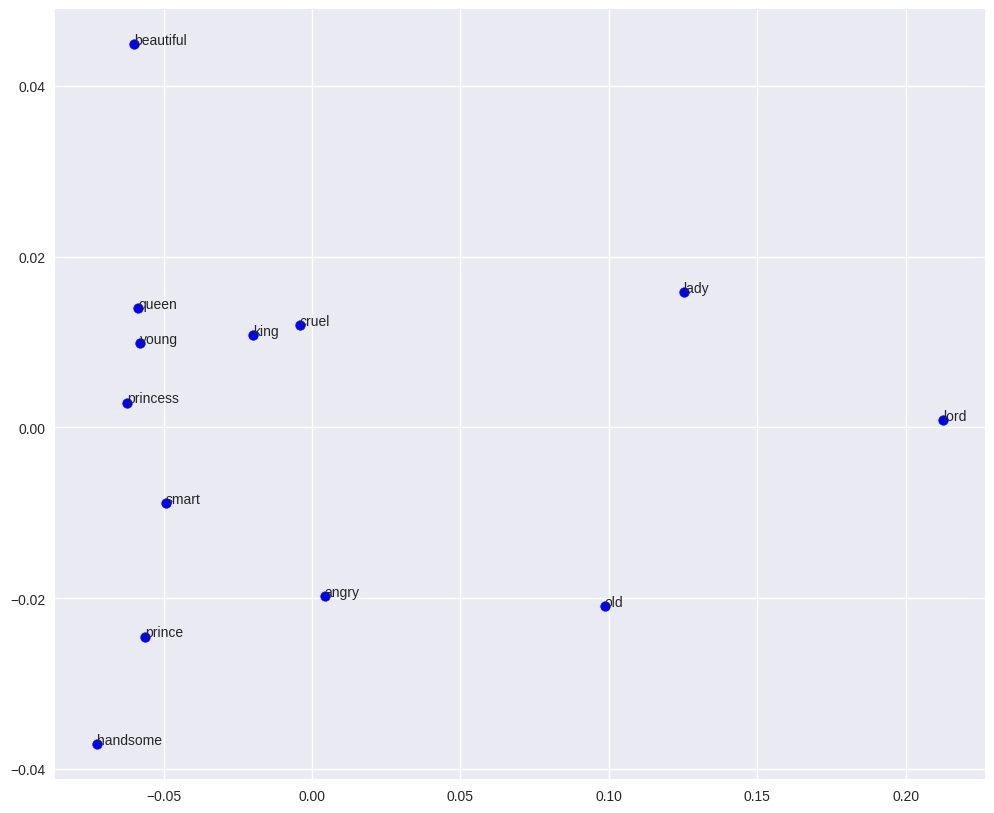

In [26]:
pca_scatterplot(model, ['smart', 'angry', 'beautiful', 'handsome', 'cruel', 'old', 'young',
                                'prince', 'princess', 'lady', 'king', 'queen', 'lord'])

**Выводы**.
Было произведено удаление стоп-слов, проведена лемматизации, а также немного видоизменен набор прилагательных для визуализации (лексема *smart* поменяна на *angry, а gentle* на *cruel*). В результате связь эпитетов с существительными особо не изменилась. *Young* и *beautiful* по-прежнему является характеристикой принцессы и королевы. *Король* в текстах Шекспира описывается как умный, красивый, жестокий и злой. Эти же эпитеты применимы и к принцу. Леди и лорд харктеризуются как старые, злые или умные.
Таким образом, удаление стоп-слов и лемматизация не повлияли на связи между словами. Это объясняется тем, что в стоп-слова входят, как правило, короткие служебные части речи, которые не рассматривались при анализе. А лемматизация, возможно, изменила бы результаты, если бы рассматривались глагольные формы, а не существильные с прилагательными.